<p><img alt="Colaboratory logo" width="60px" height="50px" src="http://martingramatica.me/img/myNameBlack.png" align="left" hspace="10px" vspace="0px"></p>

<h1>COVID-19 En Argentina - Podio mundial</h1>

Utilizando la infromación a nivel global ofrecida en https://github.com/CSSEGISandData me propuse hacer una comparación de los países con mayor cantidad de casos en el mundo, para evaluar su evolución.

Para el análisis tomo como día 0 el día en donde aparece el primer caso en cada país. En otras palabras, no utilizamos fechas, sino días de afectación de la pandemia en el país bajo análisis. 

Te invito a que participes, ya sea actualizando o corrigiendo datos, aprotando nuevos análisis de la información o simplemente con sugerencias e ideas.

<strong>Gracias!!!</strong>

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

currentDirectory = os.getcwd()
days_margin = 18 # amount of days to analyze
amount_of_countries = 10


In [10]:
# Leemos el archivo csv con los casos
confirmed_df = pd.read_csv(currentDirectory + "\\data_world\\time_series_19-covid-Deaths.csv") 

del confirmed_df['Lat']
del confirmed_df['Long']
del confirmed_df['Province/State']

confirmed_df = confirmed_df.set_index('Country/Region')

confirmed_df.columns = pd.to_datetime(confirmed_df.columns)

<h2>TOP MUNDIAL</h2>

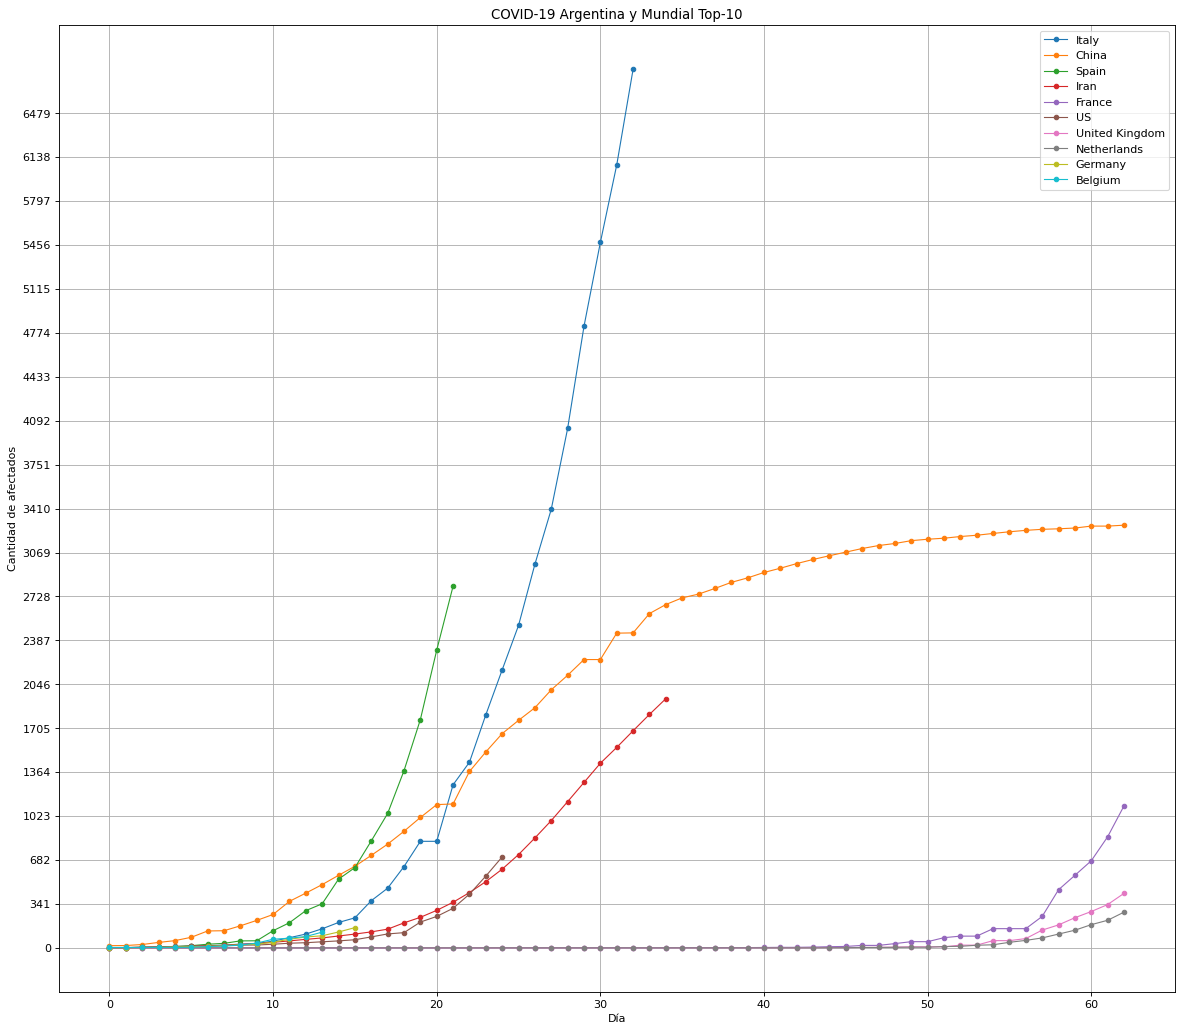

In [11]:
grouped = confirmed_df.groupby(level=0).sum()
sorted = grouped.sort_values(by=grouped.columns[grouped.columns.size-1], ascending=False)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

legend = []

max_val = 0

for i in range(0,amount_of_countries):
    data = confirmed_df.loc[sorted.index[i],:][confirmed_df.loc[sorted.index[i],:]>0].groupby(level=0).sum()
    if isinstance(data, pd.DataFrame):
        data = data.loc[sorted.index[i],:]
    
    if i == 0:
        max_val = data.max()
    
    data.reset_index(drop=True, inplace=True)
    data.plot.line(marker="o", linewidth=1, markersize=4)
    legend.append(sorted.index[i])


plt.yticks(np.arange(0, max_val, max_val/20))

plt.grid(True)

plt.title('COVID-19 Argentina y Mundial Top-' + str(amount_of_countries))
plt.legend(legend)

plt.xlabel('Día')
plt.ylabel('Cantidad de afectados')

plt.show()

<h2>TOP MUNDIAL y ARGENTINA</h2>

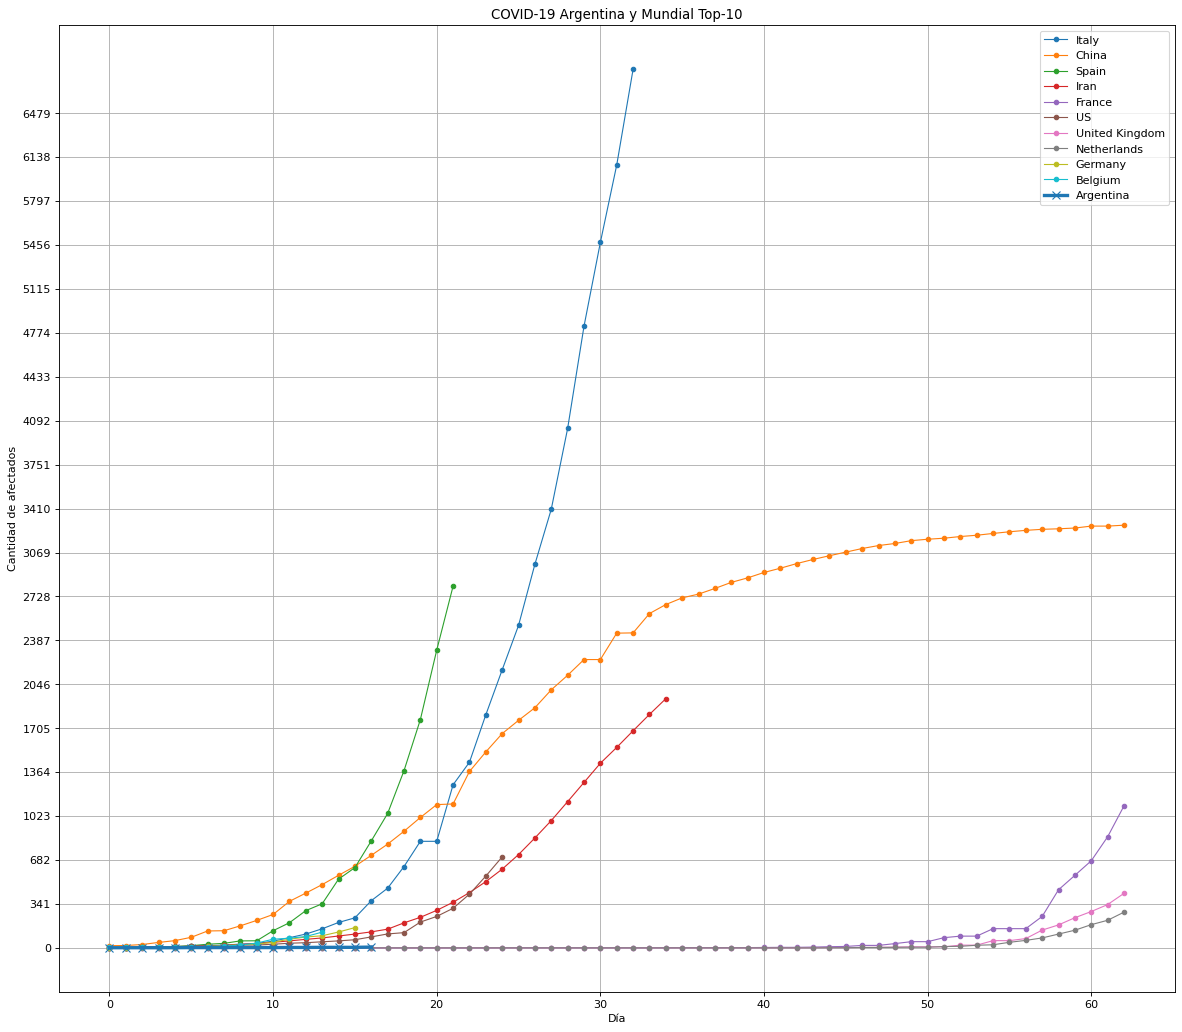

In [12]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

legend = []

max_val = 0

for i in range(0,amount_of_countries):
    data = confirmed_df.loc[sorted.index[i],:][confirmed_df.loc[sorted.index[i],:]>0].groupby(level=0).sum()
    if isinstance(data, pd.DataFrame):
        data = data.loc[sorted.index[i],:]
    
    if i == 0:
        max_val = data.max()
    
    data.reset_index(drop=True, inplace=True)
    data.plot.line(marker="o", linewidth=1, markersize=4)
    legend.append(sorted.index[i])


arg = confirmed_df.loc['Argentina',:][confirmed_df.loc['Argentina',:]>0]
arg.reset_index(drop=True, inplace=True)
arg.plot.line(marker="x", linewidth=3, markersize=8)
legend.append('Argentina')

plt.yticks(np.arange(0, max_val, max_val/20))

plt.grid(True)

plt.title('COVID-19 Argentina y Mundial Top-' + str(amount_of_countries))
plt.legend(legend)

plt.xlabel('Día')
plt.ylabel('Cantidad de afectados')

plt.show()